python 3.8일때, orange=3.25 설치 하여 사용 가능

총 23개 데이터셋(breast 포함) CD 값 : 1.1647
총 22개 데이터셋(breast 제외) CD 값 : 1.1908

In [9]:
!pip install orange3==3.25

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
     |████████████████████████████████| 2.6 MB 10.0 MB/s eta 0:00:01
  Attempting uninstall: orange3
    Found existing installation: Orange3 3.36.2
    Uninstalling Orange3-3.36.2:
      Successfully uninstalled Orange3-3.36.2


[2.08 2.84 3.84 1.24]
Critical Difference =  0.8741652017782451


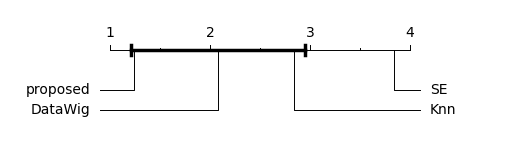

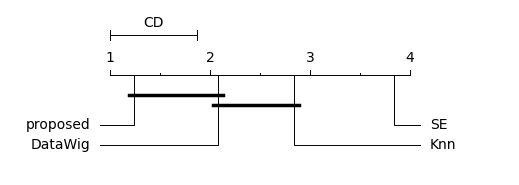

In [1]:
# 본페로니 듄테스트
import numpy as np
import scipy.stats as st
import Orange
from Orange.evaluation import compute_CD
import matplotlib.pyplot as plt

# RMSE 데이터
DataWig = [0.5641, 0.3699, 0.2146, 0.2786, 0.261, 0.5095,0.4574, 0.5403, 0.2783, 0.1475, 0.1748, 0.2621, 0.2543, 0.2884, 0.2698, 0.1641,
            0.1724, 0.3368, 0.4654, 0.1613, 0.2222, 0.3853, 0.3885, 0.2227, 0.2602]

Knn = [0.7109, 0.4442, 0.2582, 0.2589, 0.3243, 0.5531, 0.4302, 0.7072, 0.3055, 0.1693, 0.1883, 0.3186, 0.2397, 0.3589, 0.2819, 0.1637,
            0.2448, 0.3905, 0.4182, 0.1726, 0.3045, 0.403, 0.5307, 0.267, 0.3151]

SE = [0.6371, 0.7026, 0.5803, 0.683, 0.246, 0.6562, 0.7228, 0.6469, 0.4986, 0.6622, 0.7074, 0.3842, 0.6346, 0.6943, 0.4786, 0.6207,
        0.3185, 0.7025, 0.9933, 1.2148, 1.2584, 0.5213, 0.6863, 0.5643, 1.2588]

proposed = [0.3897, 0.3094, 0.1894, 0.2339, 0.1793, 0.2007, 0.4645, 0.3267, 0.1784, 0.1316, 0.1755, 0.2209, 0.3013, 0.2815, 0.238,
        0.1228, 0.1658, 0.2836, 0.3547, 0.0722, 0.1892, 0.3054, 0.3885, 0.1573, 0.2238]

# 데이터셋 개수
N = 25

# 각 method의 순위 계산 (수정된 부분)
# 이 부분은 accuracy 할 때 순위 계산되는 부분
# ranks = np.argsort(np.argsort(-np.vstack((DataWig, Knn, SE, proposed)), axis=0), axis=0) + 1
# 이 부분은 rmse 할 때 순위 계산되는 부분
ranks = np.argsort(np.argsort(np.vstack((DataWig, Knn, SE, proposed)), axis=0), axis=0) + 1


# 각 method의 평균 순위 계산
average_ranks = np.mean(ranks, axis=1)
print(average_ranks)
# method의 이름
names = ['DataWig', 'Knn', 'SE', 'proposed']

def compute(avranks):
    # CD
    cd = Orange.evaluation.compute_CD(avranks, N, alpha="0.05", test="bonferroni-dunn")
    print("Critical Difference = ", cd)

    # CD 막대기 proposd 기준 좌우로 표시하기
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.0, cdmethod=0)
    plt.show()

    # CD 막대기 위쪽에 따로 표시하기
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.0)
    plt.show()

# average_ranks를 활용하여 compute 함수 호출
compute(average_ranks)

In [ ]:
## Friedman test
from scipy.stats import friedmanchisquare

# 데이터셋 준비 (25개의 샘플을 가진 5개의 그룹)
f_data = [
    [0.5641, 0.3699, 0.2146, 0.2786, 0.261, 0.5095,0.4574, 0.5403, 0.2783, 0.1475, 0.1748, 0.2621, 0.2543, 0.2884, 0.2698, 0.1641,
            0.1724, 0.3368, 0.4654, 0.1613, 0.2222, 0.3853, 0.3885, 0.2227, 0.2602],   # DataWig
    [0.7109, 0.4442, 0.2582, 0.2589, 0.3243, 0.5531, 0.4302, 0.7072, 0.3055, 0.1693, 0.1883, 0.3186, 0.2397, 0.3589, 0.2819, 0.1637,
            0.2448, 0.3905, 0.4182, 0.1726, 0.3045, 0.403, 0.5307, 0.267, 0.3151],   # Knn
    [0.6371, 0.7026, 0.5803, 0.683, 0.246, 0.6562, 0.7228, 0.6469, 0.4986, 0.6622, 0.7074, 0.3842, 0.6346, 0.6943, 0.4786, 0.6207,
        0.3185, 0.7025, 0.9933, 1.2148, 1.2584, 0.5213, 0.6863, 0.5643, 1.2588],   # SE
    [0.3897, 0.3094, 0.1894, 0.2339, 0.1793, 0.2007, 0.4645, 0.3267, 0.1784, 0.1316, 0.1755, 0.2209, 0.3013, 0.2815, 0.238,
        0.1228, 0.1658, 0.2836, 0.3547, 0.0722, 0.1892, 0.3054, 0.3885, 0.1573, 0.2238]   # Proposed
]

# Friedman 검정 수행
statistic, p_value = friedmanchisquare(*f_data)

# 결과 출력
print("Friedman 검정 통계량:", statistic)
print("p-value:", p_value)